Hosted on https://pypi.org/project/python-kkmeans/

In [1]:
!pip install python-kkmeans

In [3]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, make_blobs

In [2]:
from kkmeans import rbf_kernel, kkmeans, kmeans_plusplus

### Baseline Case

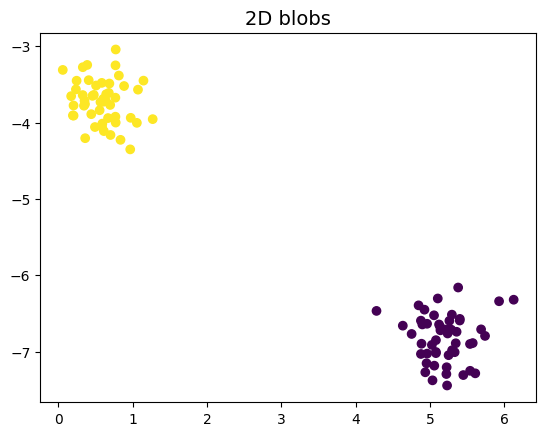

In [77]:
X = []
n_clusters = 2

X, _ = make_blobs(n_samples=100, centers=n_clusters, cluster_std=0.3)
cluster_assignments = kkmeans(X, n_clusters)

plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
plt.title('2D blobs', fontsize=14)
plt.show()

In [78]:
X, _ = make_circles(n_samples=1_000, factor=0.1, noise=0.05, random_state=0)
cluster_assignments = kkmeans(X, n_clusters, kernel_function=lambda X: rbf_kernel(X, sigma=0.4),
        initial_cluster_assignments=kmeans_plusplus, max_iterations=10, tol=1e-2)

plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
plt.title('2D blobs', fontsize=14)
plt.show()

axs.scatter(X[:, 0], X[:, 1], c=cluster_assignments,
            cmap='viridis', marker='o')
axs.set_title('2D circles', fontsize=FONT_SIZE)




NameError: name 'kmeans_plusplus' is not defined

### Parameter $\sigma$

- Controls the "width of the kernel"
- $k(x_i, x_j)$ range: [0;1]
- $\sigma$ influences rate of this decrease; higher $\sigma$ more flat curve
- => $\sigma$ more localized clusters -> potential overfitting, higher $\sigma$ more global clustering -> potential underfitting



Gradient of first 5 points: [-0.39346934 -0.31606028 -0.19170025 -0.11627208 -0.07052258]


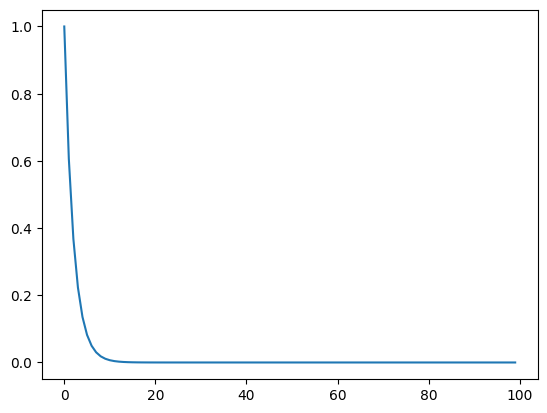

In [41]:
x = range(0,100)
sigma = 1
y = [np.exp(-x_i/(2*sigma**2)) for x_i in x]
print(f"Gradient of first 5 points: {np.gradient(y)[:5]}")

plt.plot(x, y)
plt.show()

In [5]:
# Dense clusters
X_dense, y_dense = make_blobs(n_samples=100, centers=3, cluster_std=0.3, random_state=42)
sigma_dense_good = 0.5
sigma_dense_bad = 3

# Sparse clusters
X_sparse, y_sparse = make_blobs(n_samples=100, centers=3, cluster_std=3, random_state=42)

sigma_sparse_good = 2.5
sigma_sparse_bad = 0.5

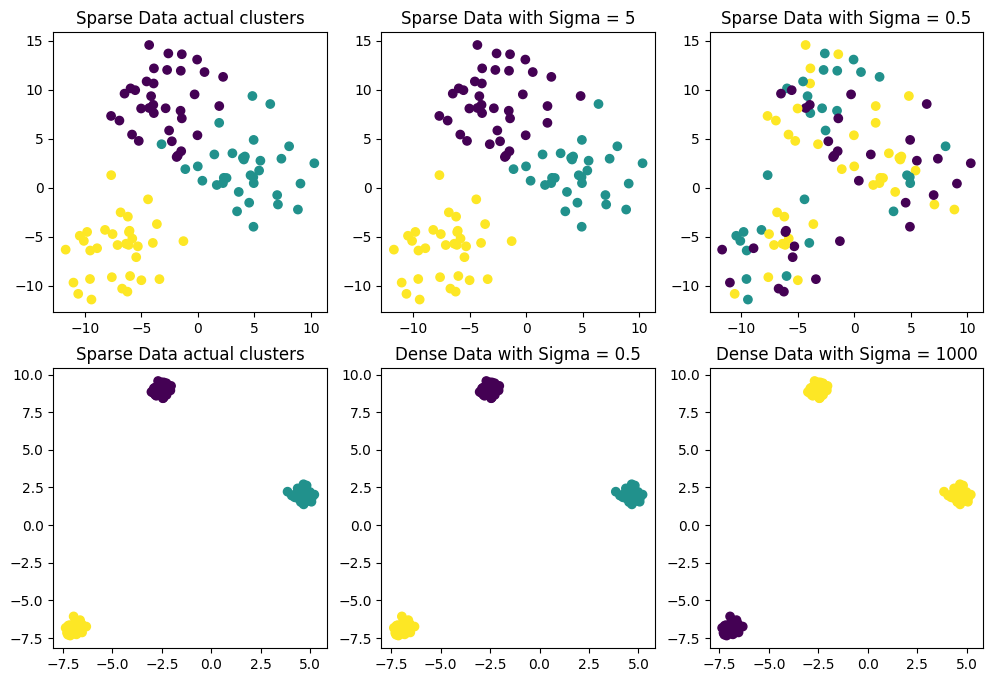

In [53]:
_, axs = plt.subplots(2, 3, figsize=(12, 8))

# Sparse
axs[0, 0].scatter(X_sparse[:, 0], X_sparse[:, 1], c=y_sparse)
axs[0, 0].set_title("Sparse Data actual clusters")

y_good_sparse = kkmeans(X_sparse, kernel_function=lambda X: rbf_kernel(X, sigma=5), n_clusters=3)
axs[0, 1].scatter(X_sparse[:, 0], X_sparse[:, 1], c=y_good_sparse)
axs[0, 1].set_title("Sparse Data with Sigma = 5")

y_bad_sparse = kkmeans(X_sparse, kernel_function=lambda X: rbf_kernel(X, sigma=0.5), n_clusters=3)
axs[0, 2].scatter(X_sparse[:, 0], X_sparse[:, 1], c=y_bad_sparse)
axs[0, 2].set_title("Sparse Data with Sigma = 0.5")

# Dense
axs[1, 0].scatter(X_dense[:, 0], X_dense[:, 1], c=y_dense)
axs[1, 0].set_title("Sparse Data actual clusters")

y_good_dense = kkmeans(X_dense, kernel_function=lambda X: rbf_kernel(X, sigma=0.5), n_clusters=3)
axs[1, 1].scatter(X_dense[:, 0], X_dense[:, 1], c=y_good_dense)
axs[1, 1].set_title("Dense Data with Sigma = 0.5")

y_bad_dense = kkmeans(X_dense, kernel_function=lambda X: rbf_kernel(X, sigma=1000), n_clusters=3)
axs[1, 2].scatter(X_dense[:, 0], X_dense[:, 1], c=y_bad_dense)
axs[1, 2].set_title("Dense Data with Sigma = 1000")

plt.show()